In [1]:
from dadac import *
import matplotlib.pyplot as plt
import numpy as np

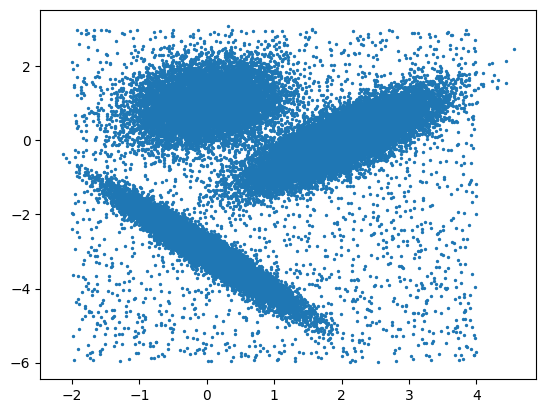

In [2]:
n = 10000
d1 = np.random.multivariate_normal([0,1],cov = 0.3*np.array([[1,0.2],[0.2,1]]), size = n)
d2= np.random.multivariate_normal([0,-3],cov = 0.5*np.array([[0.7,-0.8],[-0.8,1]]), size = n*2)
d3 = np.random.multivariate_normal([2,0],cov = 0.4*np.array([[1,0.75],[0.75,0.9]]), size = n*2)
d4 = np.array([np.random.uniform(-2,4,2000), np.random.uniform(-6,3,2000)]).T

d = np.concatenate([d1,d2,d3,d4])
plt.scatter(d[:,0], d[:,1], s = 2)

In [3]:
data = Data(d)
data.compute_distances(200)
data.compute_id_2NN()
data.compute_density_kstarNN()
data.compute_clustering_ADP(Z = 3)

/home/francesco/Desktop/dssc/robavaria/cc/dadac/bin/libdadac.so
You are running in a notebook maybe the timing output will break, but everything should be fine 
Building the KDtree v2:
	Total time: 0.048s

KNN search:
	Total time: 0.478s

ID estimation:
	ID value: 1.998728
	Total time: 0.012s

Density and k* estimation:
	Total time: 0.135s

H1: Preliminary cluster assignment
	Finding putative centers: 0.008s
	Finding actual centers:   0.014s
	Tentative clustering:     0.006s
	Finalizing clustering:    0.000s

	Found 39 clusters
	Total time: 0.027s

H2: Finding border points
	Total time: 0.036s

Using dense implementation
H3: Merging clusters
	Finding merges:   0.000s
	Cluster merging:  0.000s
	Final operations: 0.004s

	Found 63 possible merges
	Surviving clusters 3
	Total time: 0.004s



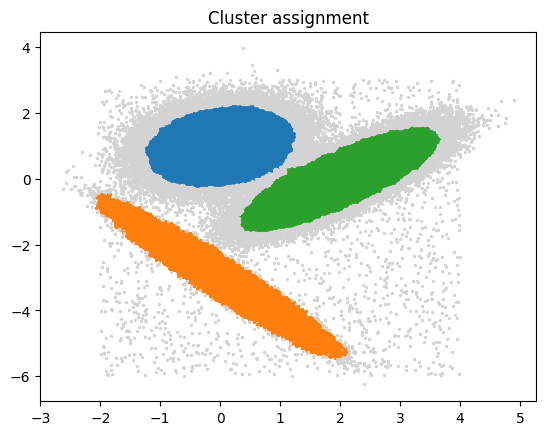

In [4]:
clusterLabels = data.cluster_assignment

for cl in set(clusterLabels):
    #print(cl)
    mask = np.where(clusterLabels == cl)
    if cl != -1:
        plt.scatter(data.data[mask,0], data.data[mask,1], s = 2)
    else:
        plt.scatter(data.data[mask,0], data.data[mask,1], s = 2, c = 'lightgray')
plt.title("Cluster assignment")
plt.show()
#plt.legend()

Text(0.5, 1.0, 'Density profile')

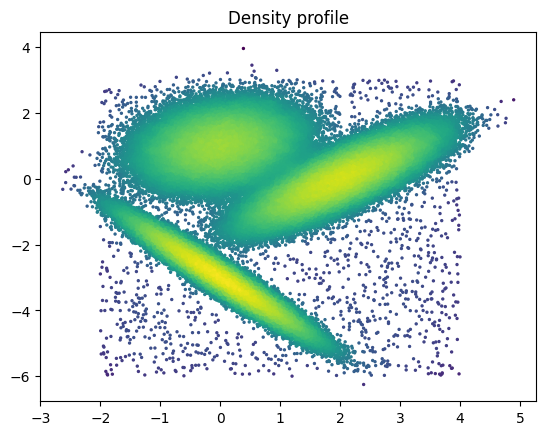

In [5]:
density = data.log_den
plt.scatter(data.data[:,0],data.data[:,1], s = 2, c = density)
plt.title("Density profile")

In [6]:
bins = 100
h = np.histogram2d(d[:,0], d[:,1], [bins, bins])

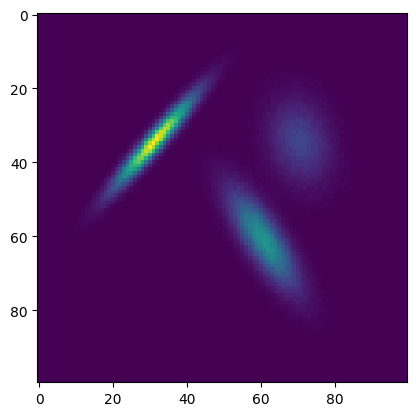

In [7]:
plt.imshow(h[0])